## Rede neural MLP simples construida no python
Nesse notebook contém uma rede neural do tipo multiple layer perceptron construida no python, contendo o algorítimo de backpropagation para o treinamento da mesma. A rede neural será treinada para a regressão de um modelo de tensão de um capacitor em um circuito de RC série, o modelo será equacionado posteriormente. 

### Referências:
https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

In [37]:
# Importando as bibliotecas necessárias
import numpy as np                             # para lidar com calculos
import pandas as pd                            # para lidar com tabelas
import matplotlib.pyplot as plt                # para a plotagem

### Função sigmoid e sua derivada
A função sigmoid $f(x)$ é definida como: 
$$f(x)= \frac{1}{1+e^{-x}} $$

A derivada da função sigmoid pode ser escrita como: 
$$f'(x) = f(x) - (1- f(x))$$

Dessa forma iremos declarar essas funções no codigo para facilitar na montagem de uma rede neural.

In [38]:
# Função de ativação
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivada da função de ativação
def sigmoid_derivative(p):
    return p * (1 - p)

# Função para o calculo do erro médio quadratico de 2 arrays
def mse(y1,y2):
    return np.mean(np.square(y1 - y2))

### Equação da temsão de um capacitor em um circuito RC série
A tensão de um capacitor em um circuito RC série com $t>0$, e considerando o capacitor descarregado pode ser definida como : 
$$ V_c = Vin*(1-e^\tau)$$

Na qual, $Vin$ é a tensão de entrada do sistema e $\tau$ pode ser definido como :
$$ \tau = \frac{-t}{R*C} $$
Onde $R$ é a resistencia $C$ é a capacitancia e $t$ é o tempo. 

In [39]:
def Vc_RC(t,r=5,c=0.1,vin=1):
    """
    Tensão de um capacitor em um circuito RC
    """
    tau = -t/(r*c)
    vc  = vin*(1 - np.exp(tau))

    return vc

## Rede Neural
A rede neural que será criada nesse notebook  é  do tipo multiple layer perceptron(MLP) com 3 camadas, sendo estas a camada de entrada, uma camada escondida e uma camada de saída.Para a criação da rede será utilizado uma classe do python, para facilitar o treinamento. No treinamento será utilizado o algorítimo de  Backpropagation. Este algorítimo possui 2 fazes, na propagação para frente(feed forward) e a fase de retropropagação do erro (back-propagation).

### Feed forward
O metodo de feed foward é o qual a rede neural irá produzir o sinal de saída, de forma que nesse método são utilizadas as entradas, os pesos, bias e a função de ativação de cada neurônio das camadas instanciadas. Dessa forma será propagado os sinais de entrada mediados pelos pesos, multiplicados pela função de ativação e ajustados pelo Bias de cada camada.

O sinal de saída $ y_k $ de cada neurônio pode ser escrito da forma: 

$$ y_k = f(\sum_{i=0}^n ({X_i*W_ki}) + \theta_j)$$

Na qual, $W$ a representa a matriz de pesos da camada $j$ na qual está situado o neurónio, $X$ o vetor de entrada do neurônio e $\theta$ o bias. Os subtitulos $i$ e $j$ significam respectivamente o index do vetor de entrada do neurônio e a camada na qual o neurônio está situado, $k$ é o index do neurônio da camada $j$. 

Na equação acima a função $f(x)$ é a função de ativação, nesse notebook será utilizado a função sigmoid.
Para cada camada abaixo da camada de entrada, o vetor $X_i$ contem todas as os valores saidas $ y_k$ dos  neurónios da camada anterior.

In [43]:
# Class definition
class NeuralNetwork:
    def __init__(self, x, y, n=4):
        """
        Definição de um objeto de rede neural

        argumentos:
        x: a entrada de treino
        y: a saída desejada no treino
        n: Número de neurônios na camada escondida
        """
        self.entrada = x
        self.pesos1 = np.random.rand(self.entrada.shape[1],n)
        self.pesos2 = np.random.rand(4,1)
        self.y = y
        self.saida = np. zeros(y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.entrada, self.pesos1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.pesos2))
        # Nota-se que a saída da camada 2 é a saída do modelo
        return self.layer2

    def backprop(self):
        d_pesos2 = np.dot(self.layer1.T, 2*(self.y -self.saida)*sigmoid_derivative(self.saida))
        d_pesos1 = np.dot(self.entrada.T, np.dot(2*(self.y -self.saida)*sigmoid_derivative(self.saida), self.pesos2.T)*sigmoid_derivative(self.layer1))

        self.pesos1 += d_pesos1
        self.pesos2 += d_pesos2

    def train(self):
        self.saida = self.feedforward()
        self.backprop()
    
    def predict(self,x):
        self.entrada = x
        self.saida = self.feedforward()
        return self.saida
    
    def mostrar_pesos(self):
        print("Pesos1")
        print(self.pesos1)
        print("Pesos2")
        print(self.pesos2)
    

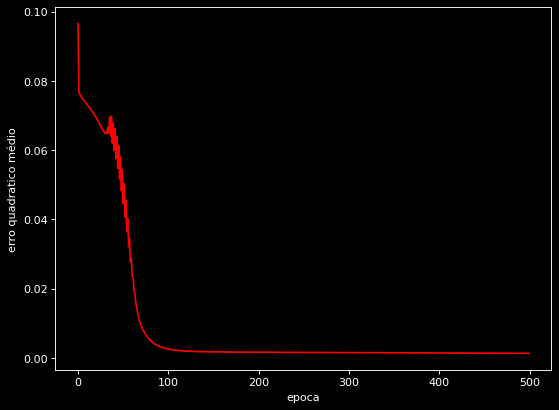

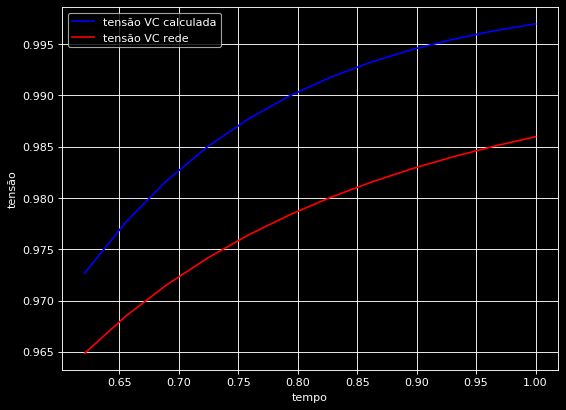

In [46]:
# Definindo um modelo matemático
t = np.arange(0,3,0.1)
vc = Vc_RC(t)

t = t/np.amax(t)
# Dividindo os datasets de treino e teste
porcent_treino = 60
tam_treino = int(len(vc)*porcent_treino/100)

# Entrada e saída de treino
x_train = t[:tam_treino]
y_train = vc[:tam_treino]

# Entrada e saída de teste
x_test = t[tam_treino:]
y_test = vc[tam_treino:]

# Transformando os vetores entrada e saída em coluna 
x_train = x_train.reshape(tam_treino,1)
y_train = y_train.reshape(tam_treino,1)
x_test  = x_test.reshape(len(x_test),1)

# Definindo o objeto da rede neural
nn_vc_model = NeuralNetwork(x_train,y_train)

# Treinando a rede por 500 epocas
erro = list()

for i in range(500):
    saida_rede = nn_vc_model.feedforward() # calculando a saida da rede
    erro.append(mse(y_train, saida_rede)) # calculabdo o mse e guardando em um vetor
    nn_vc_model.train() # utilizando um metodo do objeto rede neural para treinar

fig = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(erro,'r')
plt.xlabel("epoca")
plt.ylabel("erro quadratico médio")
plt.show()

# transformando as matrizes de entrada em vetores para a plotagem
t          = t.flatten()
vc         = vc.flatten()

# Transformando a saida da rede neural para a plotagem
saida_rede = nn_vc_model.predict(x_test)

fig = plt.figure( figsize=(8, 6), dpi=80)
plt.plot(x_test.flatten(), y_test, 'b', label="tensão VC calculada")
plt.plot(x_test.flatten(), saida_rede, 'r', label="tensão VC rede")
plt.legend()
plt.grid()
plt.xlabel("tempo")
plt.ylabel("tensão")
plt.show()

In [47]:
# Mostrando os pesos das camadas
nn_vc_model.mostrar_pesos()

Pesos1
[[-2.3963129   7.50705266 -0.70231934 -1.96301813]]
Pesos2
[[-3.81523114]
 [ 5.76861992]
 [-2.32703327]
 [-3.43872796]]
